### exchange-rate.csv

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("exchange_rate.csv")

* Frequency : 15 Minutes
* Time Series : 8
* Total Observations: 60,704
* Test Observations: 12,136
* Rolled Forecast Evaluation Data points: 8.76e6
* Horizon: {96, 192, 336, 720}

1) Australia
2) UK
3) Canada
4) Switzerland
5) China
6) Japan
7) New Zealand
8) Singapore

In [41]:
7588*8

60704

In [42]:
df.describe()

,0,1,2,3,4,5,6,OT
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,0.776974,1.634105,0.821811,0.848146,0.142833,0.009343,0.669673,0.654418
std,0.136620,0.161544,0.117123,0.168874,0.023996,0.001458,0.082836,0.115292
min,0.483297,1.211534,0.618582,0.548617,0.109292,0.006254,0.523834,0.393153
25%,0.701422,1.532887,0.727901,0.696864,0.120814,0.008331,0.593287,0.566000
50%,0.761377,1.606574,0.811582,0.813959,0.145212,0.009151,0.662767,0.669187
75%,0.873477,1.707646,0.920394,1.014018,0.159948,0.009995,0.731835,0.734901
max,1.102536,2.109000,1.091524,1.374079,0.237954,0.013202,0.832556,0.882379


In [ ]:
df.head()

,date,0,1,2,3,4,5,6,OT
0,1990/1/1 0:00,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.525486,0.5930
1,1990/1/2 0:00,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.523972,0.5940
2,1990/1/3 0:00,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.526316,0.5973
3,1990/1/4 0:00,0.7860,1.6370,0.862069,0.650618,0.211242,0.006953,0.523834,0.5970
4,1990/1/5 0:00,0.7849,1.6530,0.861995,0.656254,0.211242,0.006940,0.527426,0.5985


In [34]:
# Get general information on the dataset (ncol, nrow, nbr missing values, dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7588 non-null   object 
 1   0       7588 non-null   float64
 2   1       7588 non-null   float64
 3   2       7588 non-null   float64
 4   3       7588 non-null   float64
 5   4       7588 non-null   float64
 6   5       7588 non-null   float64
 7   6       7588 non-null   float64
 8   OT      7588 non-null   float64
dtypes: float64(8), object(1)
memory usage: 533.7+ KB


In [35]:
# Number of missing values for each variable
df.isna().sum()

date    0
0       0
1       0
2       0
3       0
4       0
5       0
6       0
OT      0
dtype: int64

In [13]:
df["date"].dtypes

dtype('O')

In [15]:
df["date"].nunique()

7588

In [36]:
df.index = pd.to_datetime(df['date'])

In [37]:
del df['date']

In [44]:
def convert_date(df):
    """
    Convert the 'date' column in the DataFrame to datetime format
    Args:
    df(pd.DataFrame): Innput DataFrame containing the 'date' object.
    Returns:
    pd.DataFrame: DataFrame with 'date' column converted to datetijme format.
    """

    if 'date' not in df.columns:
        raise KeyError("no 'date' column.")
    
    # Convert 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
        
    if df['date'].isnull().any():
        raise ValueError("Some values in the 'date' column could not be converted to datetime.")
    
    return df

In [46]:
convert_date(df)

,date,0,1,2,3,4,5,6,OT
0,1990-01-01,0.785500,1.611000,0.861698,0.634196,0.211242,0.006838,0.525486,0.593000
1,1990-01-02,0.781800,1.610000,0.861104,0.633513,0.211242,0.006863,0.523972,0.594000
2,1990-01-03,0.786700,1.629300,0.861030,0.648508,0.211242,0.006975,0.526316,0.597300
3,1990-01-04,0.786000,1.637000,0.862069,0.650618,0.211242,0.006953,0.523834,0.597000
4,1990-01-05,0.784900,1.653000,0.861995,0.656254,0.211242,0.006940,0.527426,0.598500
...,...,...,...,...,...,...,...,...,...
7583,2010-10-06,0.718494,1.222195,0.737485,0.969974,0.143697,0.008500,0.688565,0.690846
7584,2010-10-07,0.721839,1.223459,0.741155,0.977297,0.143763,0.008595,0.690288,0.695701
7585,2010-10-08,0.723197,1.234111,0.745184,0.984446,0.143997,0.008562,0.691419,0.695943
7586,2010-10-09,0.720825,1.233905,0.744131,0.980344,0.143993,0.008555,0.690942,0.692689


In [ ]:
 # Set the 'date' column as the index
df.set_index('date', inplace=True)

In [ ]:
def plot_time_series(df):
    """
    Plot time series data from t
    """

    # Create a plot with one subplot per column
    plt.figure(figsize=(10,6))

    # Plot each time series column
    for column in df.columns:
        plt.plot(df.index, df[column], label=column)

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Time series data')

    plt.legend(title='Columnns')

    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    

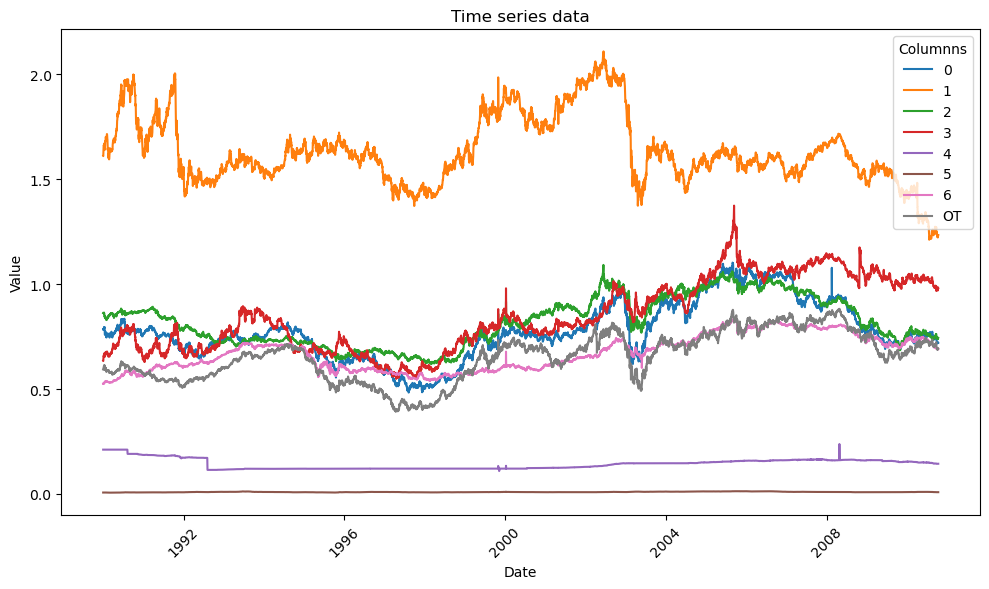

In [57]:
plot_time_series(df)

In [58]:
def plot_time_series(df, column=None, months_for_legend=6):
    """
    Plot time series data. If a column is specified, it will plot that column.
    If no column is specified, it will plot all columns.

    """

    if column is not None:
        if column not in df.columns:
            raise ValueError(f"Column '{column}' not founnd in DataFrame.")
        
        data_to_plot = df[[column]]
    else:
        data_to_plot = df

    # Plot the data
    plt.figure(figsize=(12, 6))
    for col in data_to_plot.columns:
        plt.plot(data_to_plot.index, data_to_plot[col], label=col)

    # Add legend
    legend_labels = data_to_plot.columns
    plt.legend(legend_labels, loc='upper left')

    # Format x-axis for better readability
    plt.xticks(rotation=45)
    if months_for_legend > 0:
        xticks = pd.date_range(start=df.index.min(), end=df.index.max(), freq=f'{months_for_legend}MS')
        plt.xticks(ticks=xticks, labels=xticks.strftime('%Y-%m'))

    # Add titles and labels
    plt.title("Time Series Plot")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

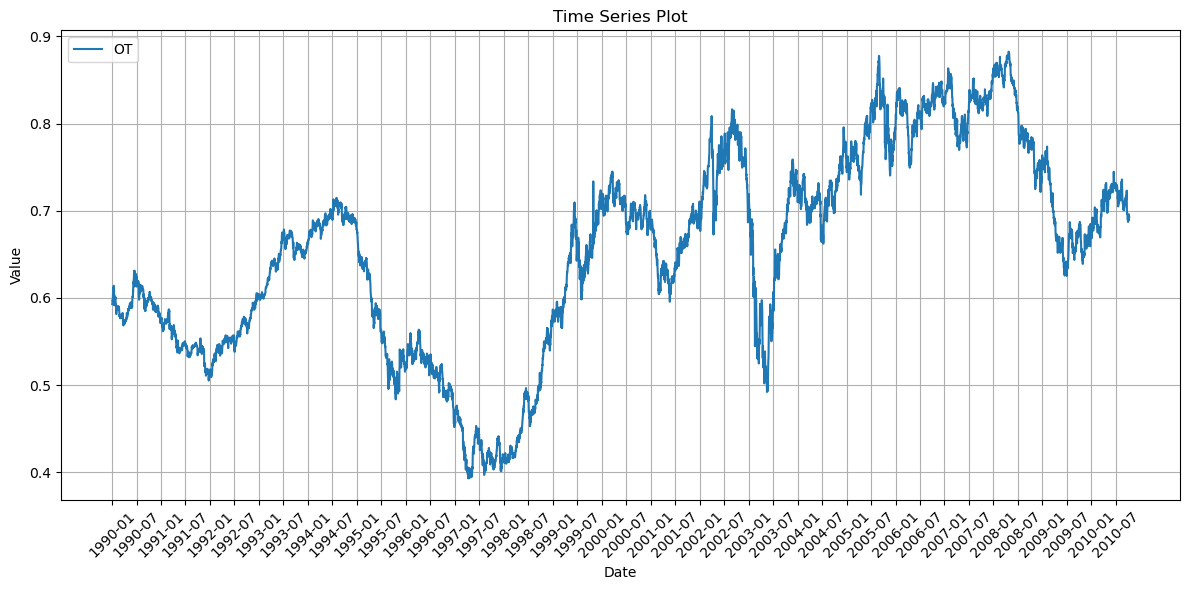

In [63]:
plot_time_series(df, column='OT')

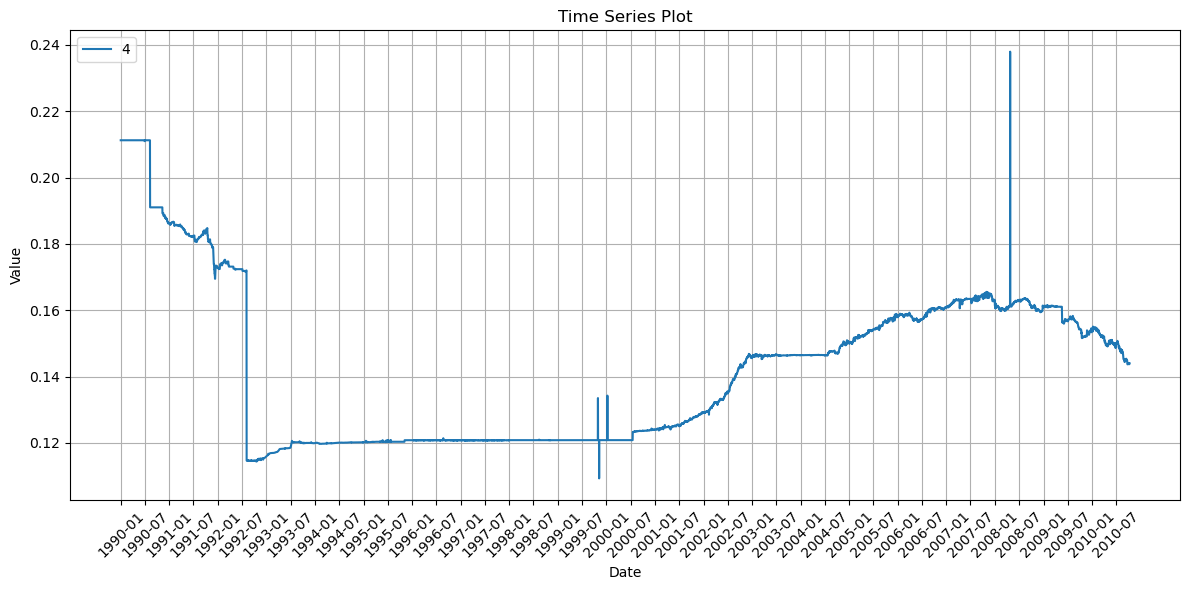

In [64]:
plot_time_series(df, column='4')